## Import Libraries

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [64]:
# Load testing data
test_data = pd.read_csv('https://raw.githubusercontent.com/ktxdev/mind-matters/refs/heads/master/data/raw/test.csv')
# Load training data
train_data = pd.read_csv('https://raw.githubusercontent.com/ktxdev/mind-matters/refs/heads/master/data/raw/train.csv')
# Concatenating the two dataset
data = pd.concat([test_data, train_data], ignore_index=True)

## Initial Exploration
### Shape and Structure

In [65]:
print(data.shape)
data.head()

(234500, 20)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,NaN
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,NaN
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,NaN
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,NaN
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,NaN


### Rename Columns

In [134]:
data.rename(columns={'Have you ever had suicidal thoughts ?': 'Had Suicidal Thoughts?'}, inplace=True)

### Data Types

In [135]:
data.dtypes

id                                     int64
Name                                  object
Gender                                object
Age                                  float64
City                                  object
Working Professional or Student       object
Profession                            object
Academic Pressure                   category
Work Pressure                       category
CGPA                                 float64
Study Satisfaction                  category
Job Satisfaction                    category
Sleep Duration                        object
Dietary Habits                        object
Degree                                object
Had Suicidal Thoughts?                object
Work/Study Hours                    category
Financial Stress                    category
Family History of Mental Illness      object
Depression                          category
dtype: object

### Data Types Conversion

In [84]:
data['Study Satisfaction'] = data['Study Satisfaction'].astype('category')
data['Job Satisfaction'] = data['Job Satisfaction'].astype('category')
data['Academic Pressure'] = data['Academic Pressure'].astype('category')
data['Work Pressure'] = data['Work Pressure'].astype('category')
data['Financial Stress'] = data['Financial Stress'].astype('category')
data['Work/Study Hours'] = data['Work/Study Hours'].astype('category')

### Checking for Missing Values

In [68]:
data.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                61262
Academic Pressure                        187836
Work Pressure                             46696
CGPA                                     187836
Study Satisfaction                       187836
Job Satisfaction                          46684
Sleep Duration                                0
Dietary Habits                                9
Degree                                        4
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                93800
dtype: int64

### Basic Statistics
#### Continuous Variables

In [114]:
data.describe()

,id,Age,CGPA
count,234500.0000,234500.000000,46664.000000
mean,117249.5000,40.361847,7.664821
std,67694.4634,12.387870,1.464707
min,0.0000,18.000000,5.030000
25%,58624.7500,29.000000,6.290000
50%,117249.5000,42.000000,7.770000
75%,175874.2500,51.000000,8.930000
max,234499.0000,60.000000,10.000000


#### Categorical Variables

In [136]:
categorical_variables = ['Name', 'Gender', 'City', 'Working Professional or Student', 'Study Satisfaction',
                         'Job Satisfaction', 'Academic Pressure', 'Work Pressure', 'Work/Study Hours',
                         'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Financial Stress',
                         'Had Suicidal Thoughts?', 'Family History of Mental Illness']
data[categorical_variables].describe()

,Name,Gender,City,Working Professional or Student,Study Satisfaction,Job Satisfaction,Academic Pressure,Work Pressure,Work/Study Hours,Profession,Sleep Duration,Dietary Habits,Degree,Financial Stress,Had Suicidal Thoughts?,Family History of Mental Illness
count,234500,234500,234500,234500,46664.0,187816.0,46664.0,187804.0,234500.0,173238,234500,234491,234496,234496.0,234500,234500
unique,554,2,124,2,5.0,5.0,5.0,5.0,13.0,81,46,36,156,5.0,2,2
top,Rohan,Male,Kalyan,Working Professional,4.0,2.0,3.0,2.0,10.0,Teacher,Less than 5 hours,Moderate,Class 12,2.0,No,No
freq,5290,128726,10978,187827,10535.0,41754.0,12393.0,40628.0,23649.0,41291,64445,82723,24541,52602.0,118513,117876


## Univariate Analysis
### Numerical Columns

In [80]:
def plot_histogram_and_boxplot(data: pd.DataFrame, column: str) -> None:
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot histogram
    sns.histplot(x=column, data=data, ax=ax1)
    # Plot boxplot
    sns.boxplot(x=data[column], data=data, ax=ax2)
    
    # Show the plot
    plt.show()

#### Age

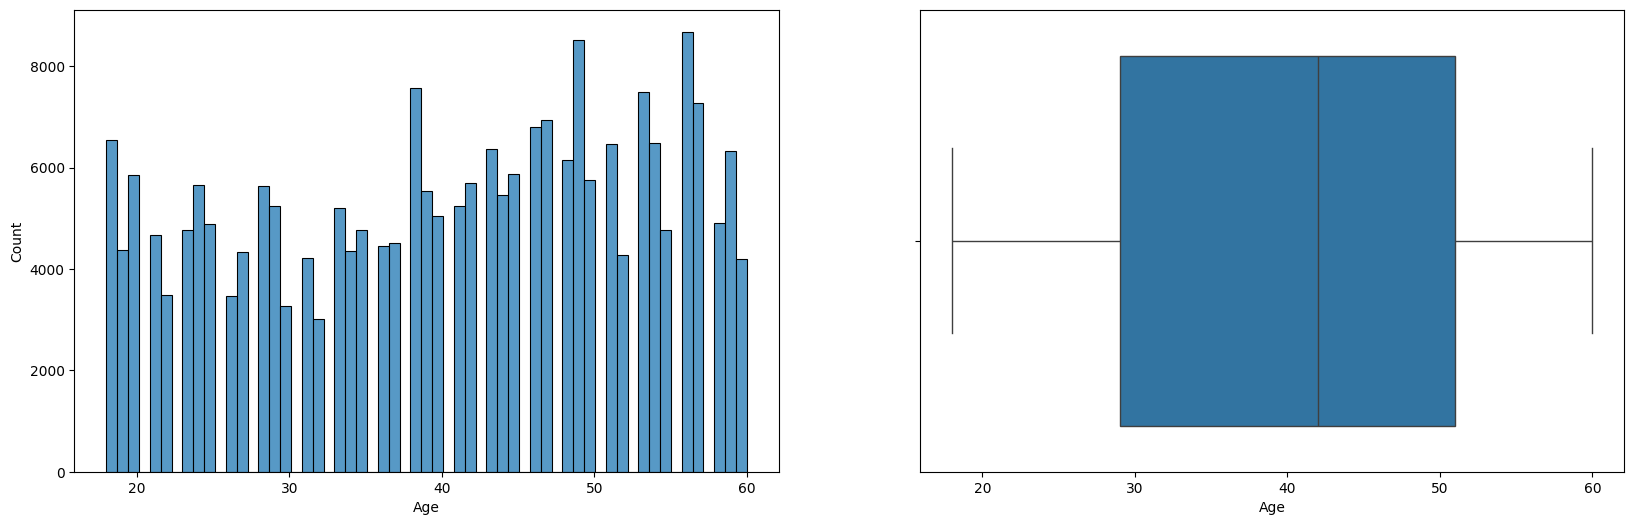

In [81]:
plot_histogram_and_boxplot(data, 'Age')

#### CGPA

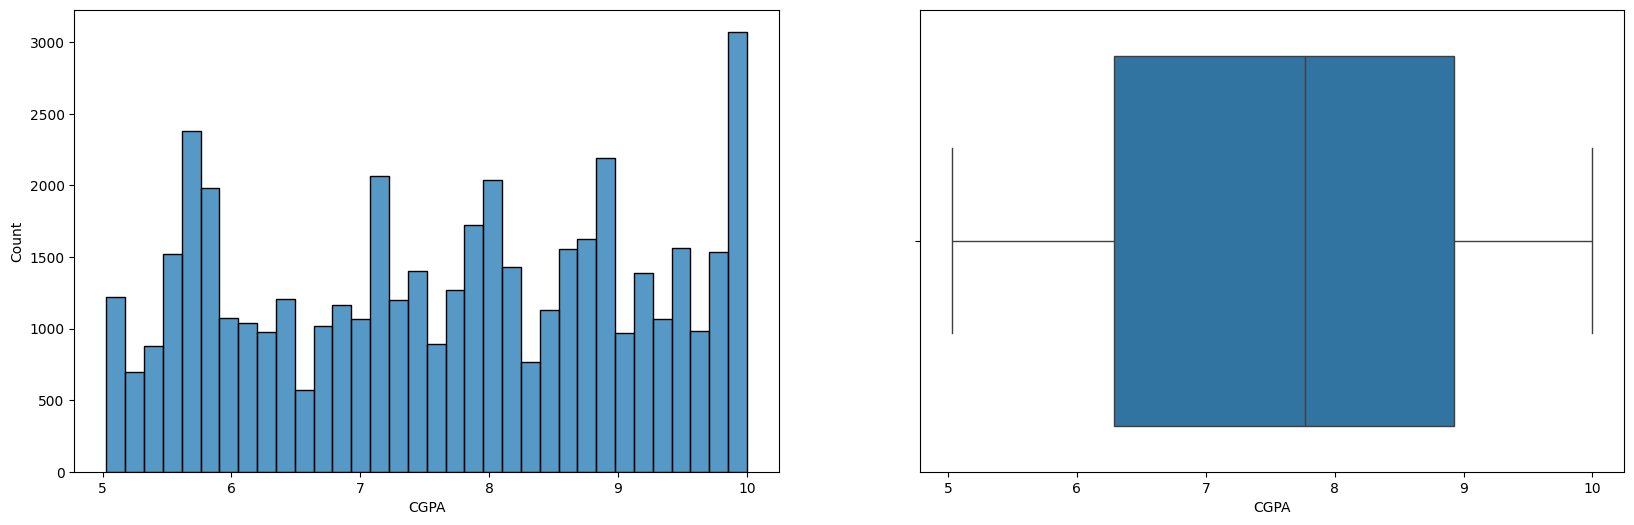

In [82]:
plot_histogram_and_boxplot(data, 'CGPA')

### Categorical Columns

In [100]:
def plot_count_plot(data: pd.DataFrame, column: str) -> None:
    # Plot countplot
    sns.countplot(data, x=column)
    
    # Change plot figure size
    plt.figure(figsize=(10, 6))
    
    # Show the plot
    plt.show()

#### Name

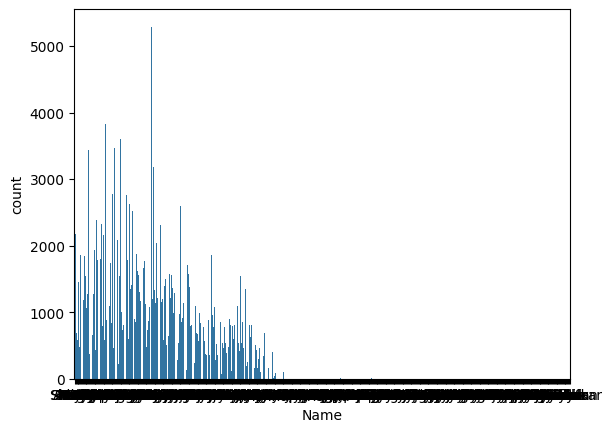

<Figure size 1000x600 with 0 Axes>

In [101]:
plot_count_plot(data, 'Name')

#### Work/Study Hours

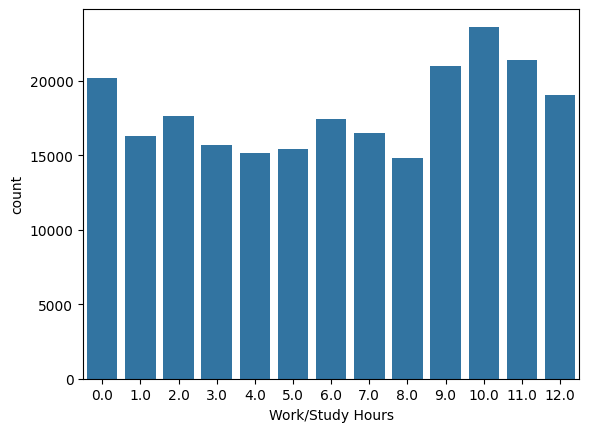

<Figure size 1000x600 with 0 Axes>

In [88]:
plot_count_plot(data, 'Work/Study Hours')

#### Gender

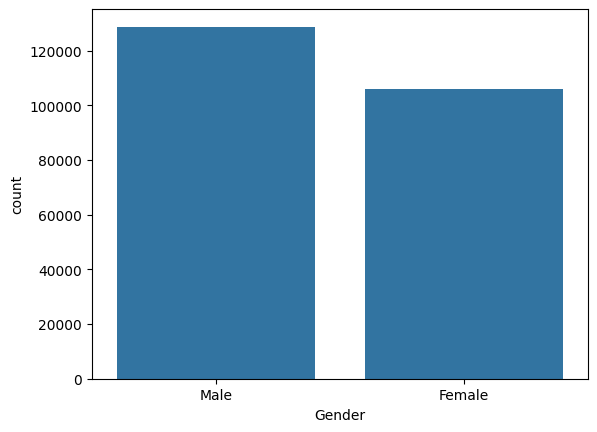

<Figure size 1000x600 with 0 Axes>

In [90]:
plot_count_plot(data, 'Gender')

#### City

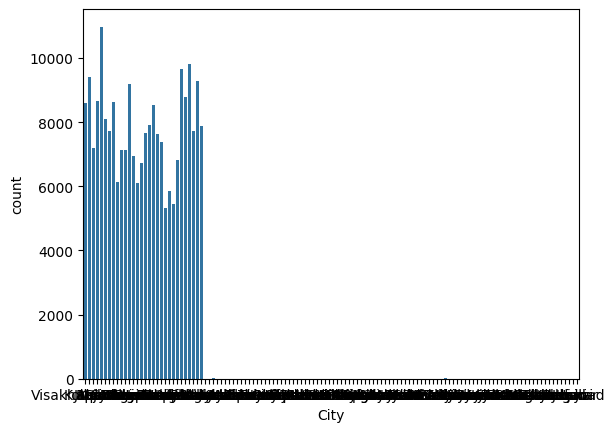

<Figure size 1000x600 with 0 Axes>

In [91]:
plot_count_plot(data, 'City')

#### Working Professional or Student

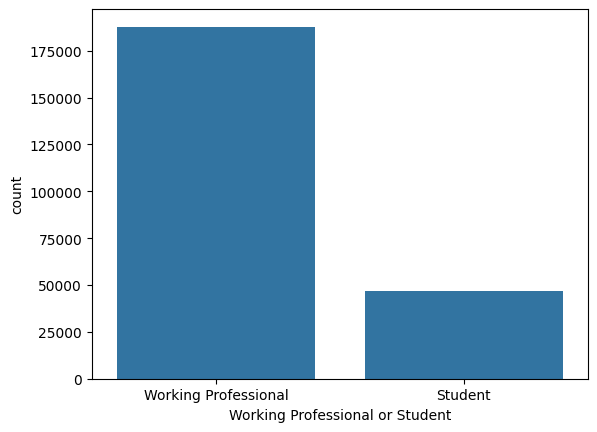

<Figure size 1000x600 with 0 Axes>

In [102]:
plot_count_plot(data, 'Working Professional or Student')

#### Study Satisfaction

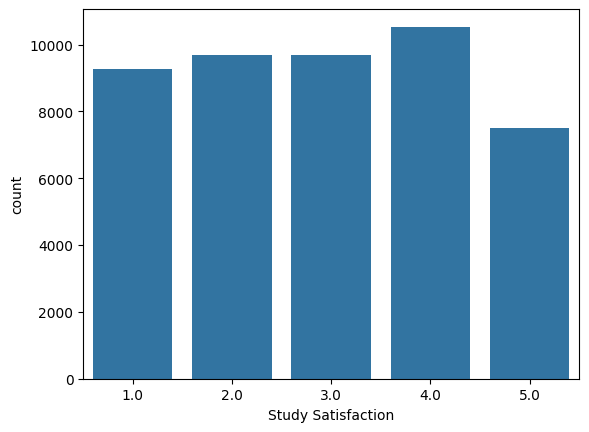

<Figure size 1000x600 with 0 Axes>

In [103]:
plot_count_plot(data, 'Study Satisfaction')

#### Job Satisfaction

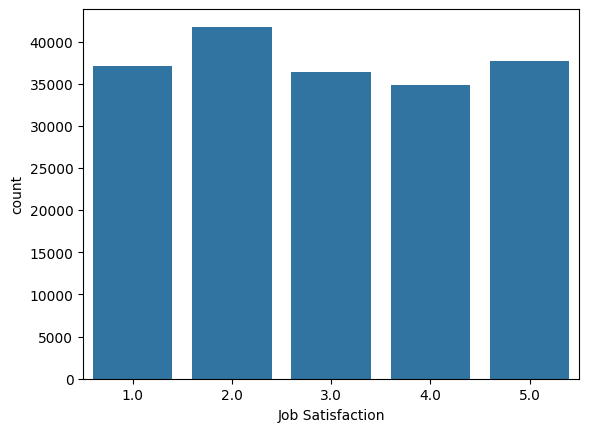

<Figure size 1000x600 with 0 Axes>

In [104]:
plot_count_plot(data, 'Job Satisfaction')

#### Academic Pressure

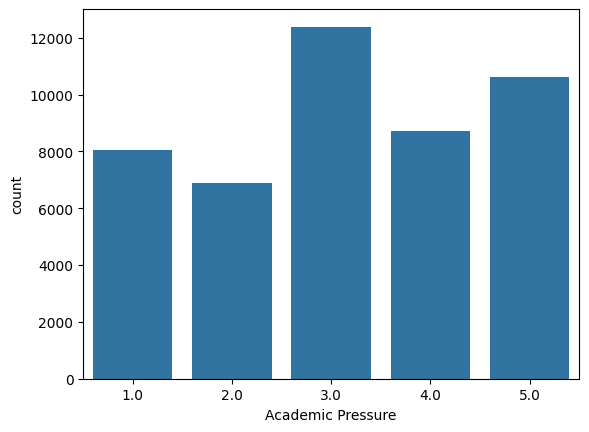

<Figure size 1000x600 with 0 Axes>

In [105]:
plot_count_plot(data, 'Academic Pressure')

#### Work Pressure

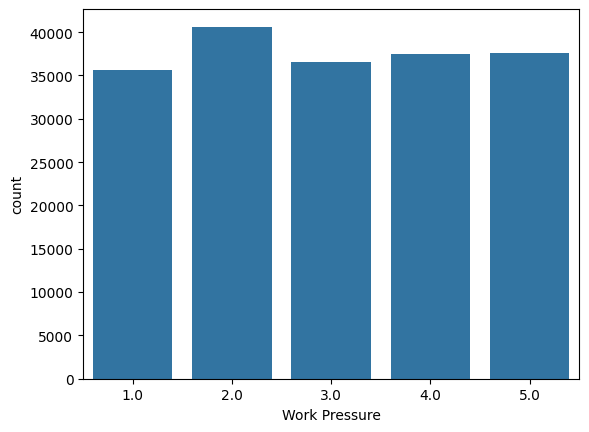

<Figure size 1000x600 with 0 Axes>

In [106]:
plot_count_plot(data, 'Work Pressure')

#### Profession

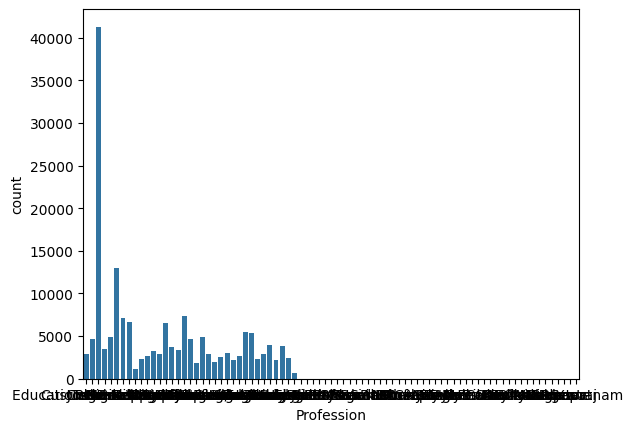

<Figure size 1000x600 with 0 Axes>

In [107]:
plot_count_plot(data, 'Profession')

#### Sleep Duration

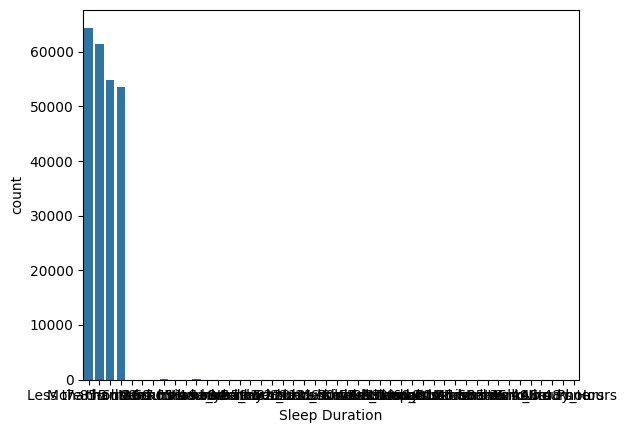

<Figure size 1000x600 with 0 Axes>

In [108]:
plot_count_plot(data, 'Sleep Duration')

#### Dietary Habits

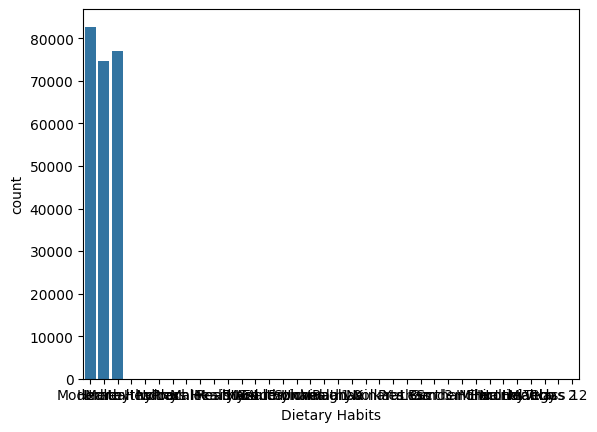

<Figure size 1000x600 with 0 Axes>

In [109]:
plot_count_plot(data, 'Dietary Habits')

#### Degree

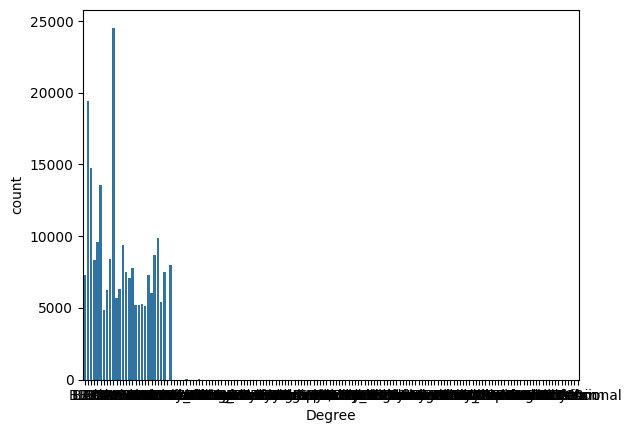

<Figure size 1000x600 with 0 Axes>

In [110]:
plot_count_plot(data, 'Degree')

#### Financial Stress

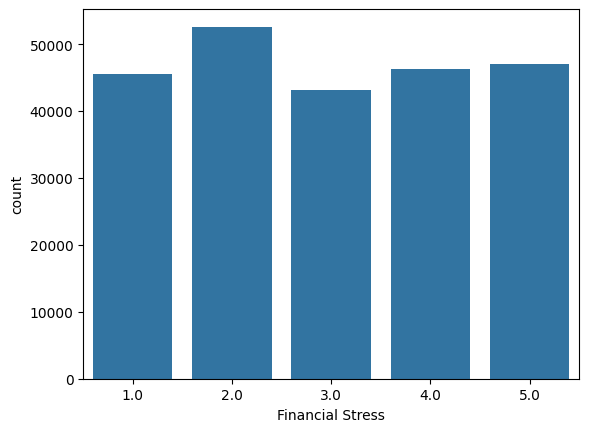

<Figure size 1000x600 with 0 Axes>

In [111]:
plot_count_plot(data, 'Financial Stress')

#### Had Suicidal Thoughts?

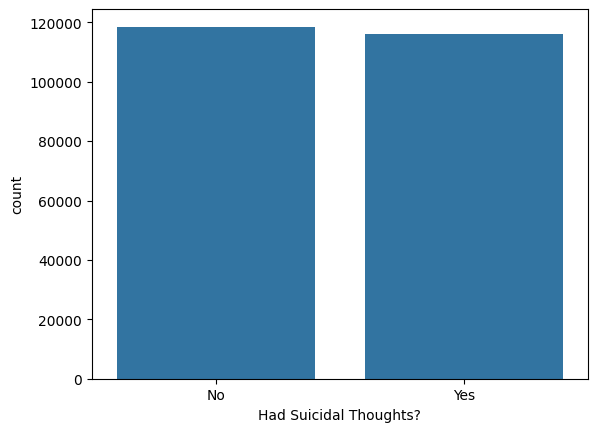

<Figure size 1000x600 with 0 Axes>

In [137]:
plot_count_plot(data, 'Had Suicidal Thoughts?')

#### Family History of Mental Illness

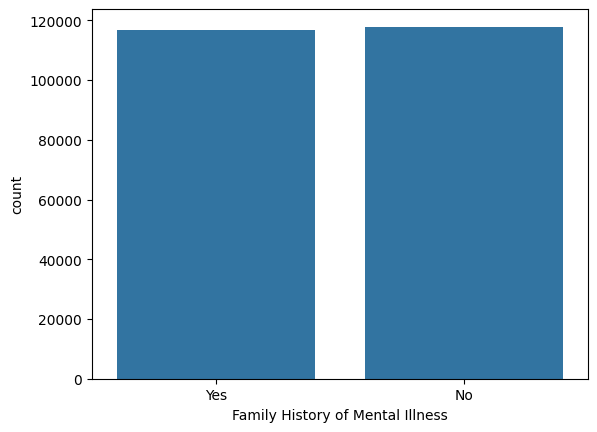

<Figure size 1000x600 with 0 Axes>

In [113]:
plot_count_plot(data, 'Family History of Mental Illness')

## Bivariate Analysis
### Numerical vs. Numerical
#### Age vs. CGPA

<Axes: xlabel='Age', ylabel='CGPA'>

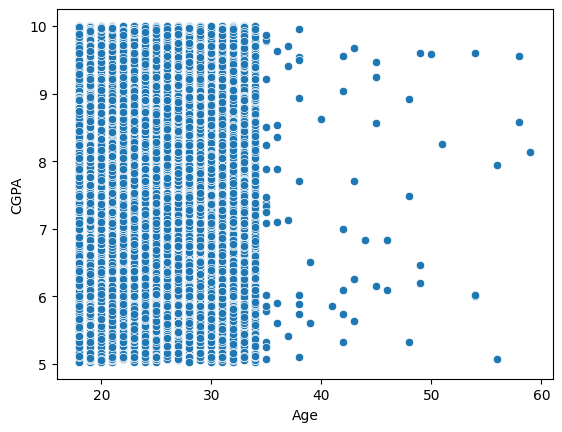

In [115]:
sns.scatterplot(x='Age', y='CGPA', data=data)

### Numerica vs. Categorical
#### Age vs. Name

<Axes: xlabel='Age', ylabel='Name'>

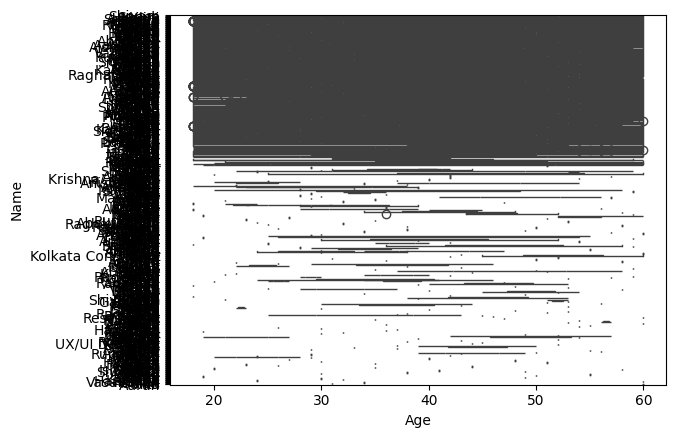

In [116]:
sns.boxplot(x='Age', y='Name', data=data)

#### Age vs. Gender

<Axes: xlabel='Age', ylabel='Gender'>

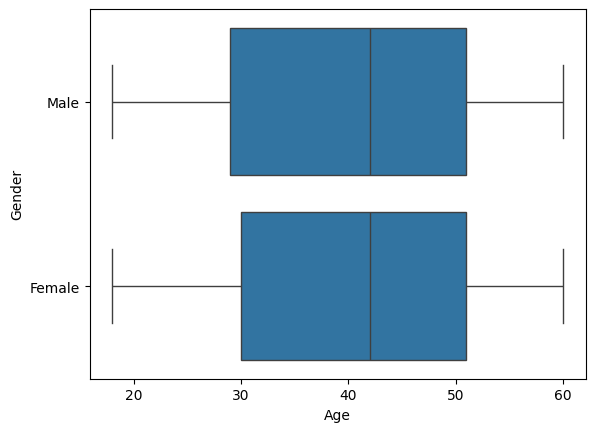

In [117]:
sns.boxplot(x='Age', y='Gender', data=data)

#### Age vs. City

<Axes: xlabel='Age', ylabel='City'>

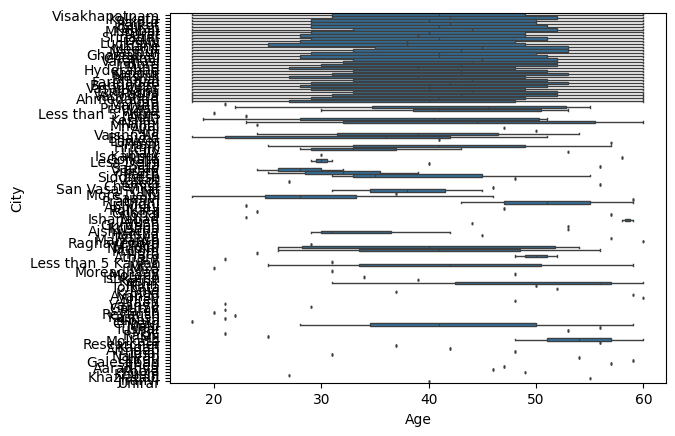

In [118]:
sns.boxplot(x='Age', y='City', data=data)

#### Age vs. Working Professional or Student

<Axes: xlabel='Age', ylabel='Working Professional or Student'>

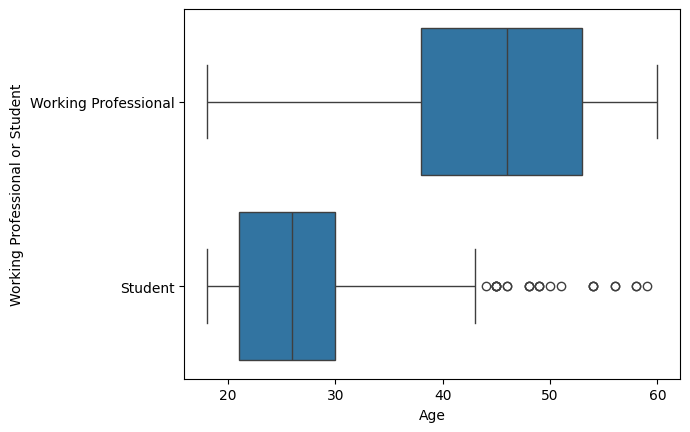

In [119]:
sns.boxplot(x='Age', y='Working Professional or Student', data=data)

#### Age vs. Study Satisfaction

<Axes: xlabel='Age', ylabel='Study Satisfaction'>

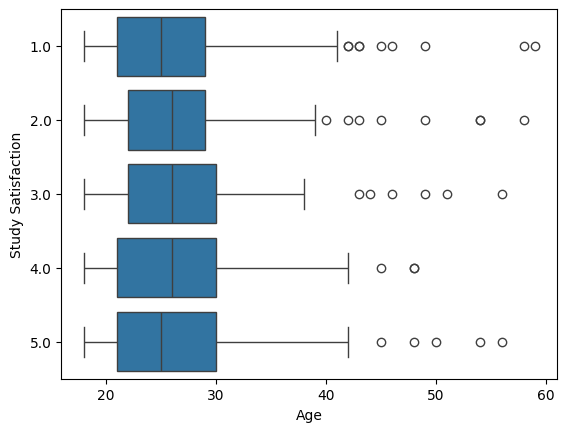

In [120]:
sns.boxplot(x='Age', y='Study Satisfaction', data=data)

#### Age vs. Job Satisfaction

<Axes: xlabel='Age', ylabel='Job Satisfaction'>

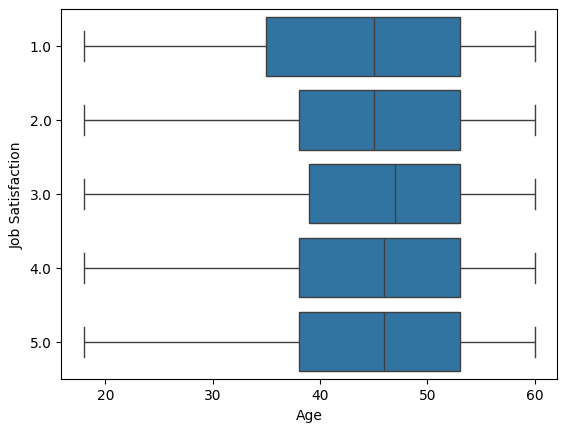

In [121]:
sns.boxplot(x='Age', y='Job Satisfaction', data=data)

#### Age vs. Academic Pressure

<Axes: xlabel='Age', ylabel='Academic Pressure'>

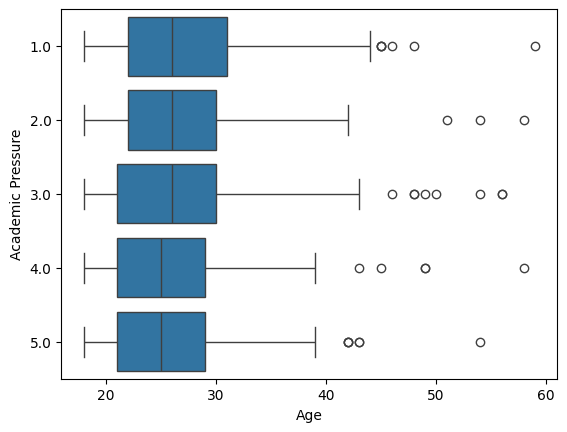

In [122]:
sns.boxplot(x='Age', y='Academic Pressure', data=data)

#### Age vs. Work Pressure

<Axes: xlabel='Age', ylabel='Work Pressure'>

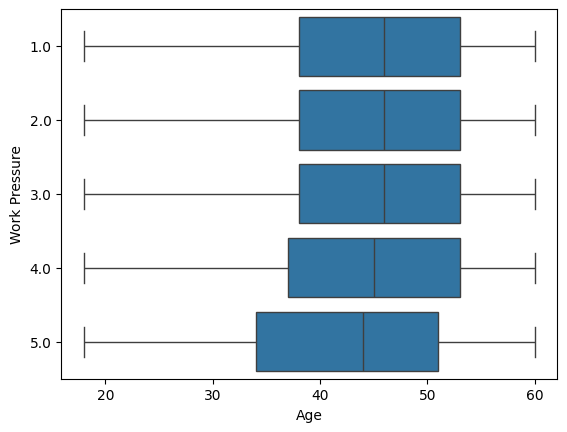

In [123]:
sns.boxplot(x='Age', y='Work Pressure', data=data)

#### Age vs. Work/Study Hours

<Axes: xlabel='Age', ylabel='Work/Study Hours'>

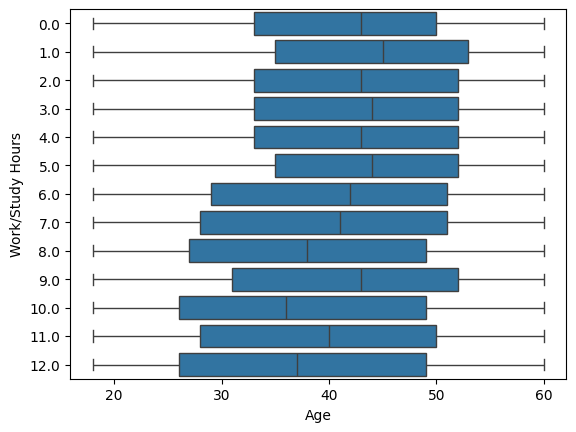

In [124]:
sns.boxplot(x='Age', y='Work/Study Hours', data=data)

#### Age vs. Profession

<Axes: xlabel='Age', ylabel='Profession'>

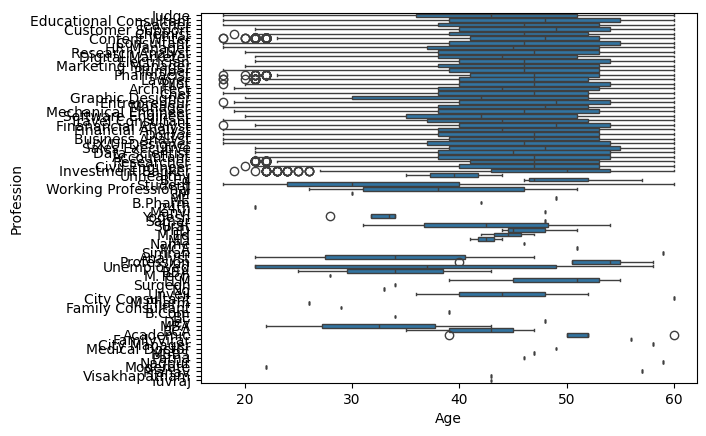

In [125]:
sns.boxplot(x='Age', y='Profession', data=data)

#### Age vs. Sleep Duration

<Axes: xlabel='Age', ylabel='Sleep Duration'>

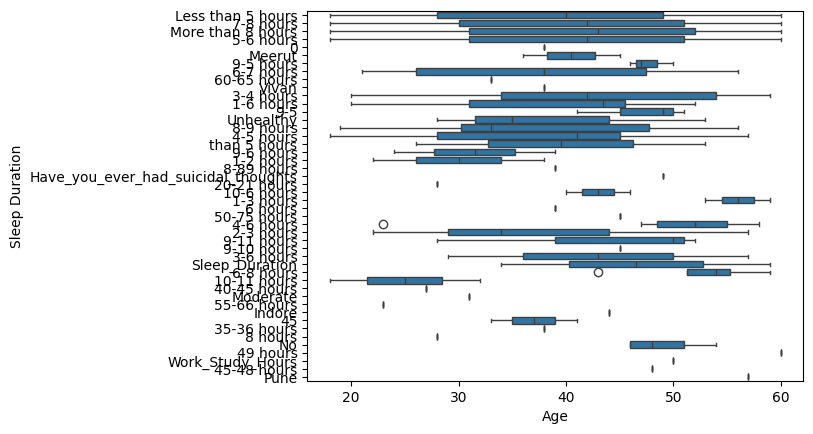

In [130]:
sns.boxplot(x='Age', y='Sleep Duration', data=data)

#### Age vs.Dietary Habits

<Axes: xlabel='Age', ylabel='Dietary Habits'>

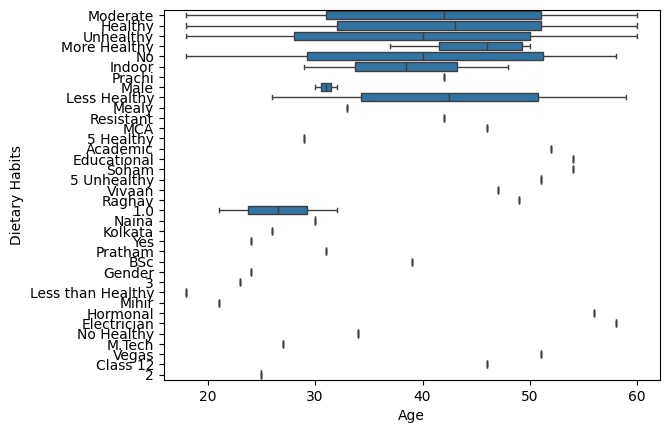

In [131]:
sns.boxplot(x='Age', y='Dietary Habits', data=data)

#### Age vs. Degree

<Axes: xlabel='Age', ylabel='Degree'>

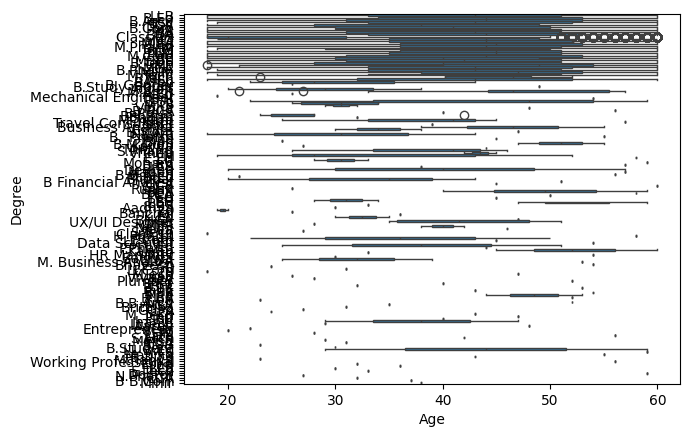

In [132]:
sns.boxplot(x='Age', y='Degree', data=data)

#### Age vs. Financial Stress

<Axes: xlabel='Age', ylabel='Financial Stress'>

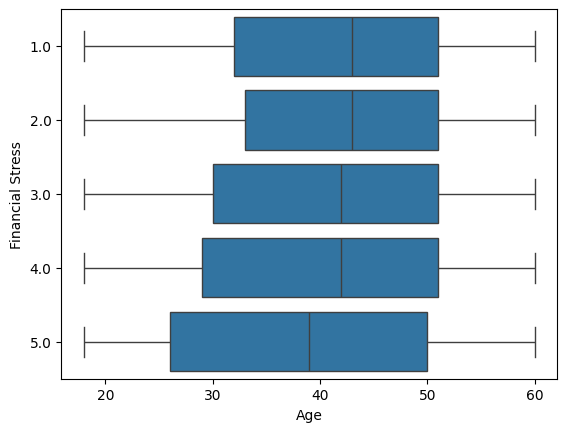

In [133]:
sns.boxplot(x='Age', y='Financial Stress', data=data)

#### Age vs. Had Suicidal Thoughts?

<Axes: xlabel='Age', ylabel='Had Suicidal Thoughts?'>

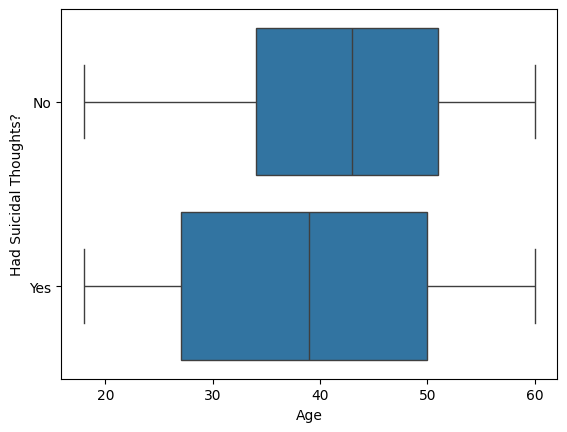

In [138]:
sns.boxplot(x='Age', y='Had Suicidal Thoughts?', data=data)

#### Age vs. Family History of Mental Illness

<Axes: xlabel='Age', ylabel='Family History of Mental Illness'>

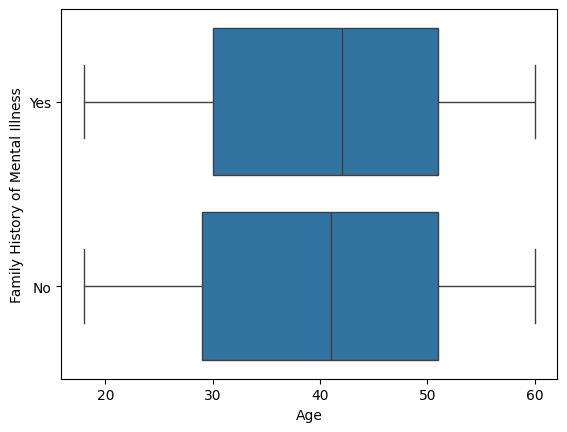

In [139]:
sns.boxplot(x='Age', y='Family History of Mental Illness', data=data)

## Handle Missing Values

In [16]:
data.isnull().sum()

Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

To handle missing values in the dataset for the columns `Job Satisfaction` and `Study Satisfaction`, we’ll create a `Job/Study Satisfaction` column by merging these columns. Since each individual is either a student or a professional, only one of these columns will have a value for each user, while the other will be empty. By consolidating them into a single column, we simplify the dataset and eliminate these missing values, as Satisfaction will contain the relevant data for each user on a consistent 1 to 5 scale. The same will be done for the columns `Academic Pressure` and `Work Pressure` by creating a `Academic/Work Pressure` column combining these two columns. For handling missing values for `Profession` since there is a student profession in the `Profession` column I will make all students have the `Student` profession and for working professional I will make all working professionals have the `Working Professional` category. Since CGPA has around 80% of missing values and imputation of this value is unreliable as most this data is missing for working professionals and not students hence we will drop the feature.

In [30]:
# Handling missing values for Job and Study satisfaction
data['Job/Study Satisfaction'] = data['Study Satisfaction'].fillna(data['Job Satisfaction'])
# Dropping the original satisfaction columns
data.drop(['Study Satisfaction', 'Job Satisfaction'], axis=1, inplace=True)

# Handling missing values for Academic and Work pressure
data['Academic/Work Pressure'] = data['Academic Pressure'].fillna(data['Work Pressure'])
# Dropping the original pressure columns
data.drop(['Academic Pressure', 'Work Pressure'], axis=1, inplace=True)

# Fill missing values for profession
data.loc[(data['Working Professional or Student'] == 'Student') & (data['Profession'].isnull()), 'Profession'] = 'Student'
data.loc[(data['Working Professional or Student'] == 'Working Professional') & (data['Profession'].isnull()), 'Profession'] = 'Working Professional'

# Dropping CGPA feature
data.drop(columns=['CGPA'], inplace=True)

#### Re-checking missing values

In [41]:
data.isnull().sum()

Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
Sleep Duration                            0
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Job/Study Satisfaction                   15
Academic/Work Pressure                   21
dtype: int64

Since the number of records with missing values is no longer significant I will drop those records

In [43]:
data.dropna(inplace=True)
# Printin the shape of the data after dropping records
print(data.shape)

(140661, 15)
